### Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy


sns.set()

---

### Data

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


---

### EDA

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Histogram Plot**

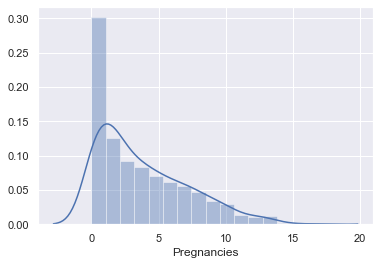

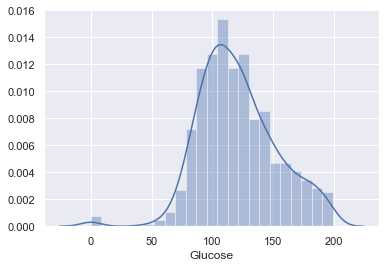

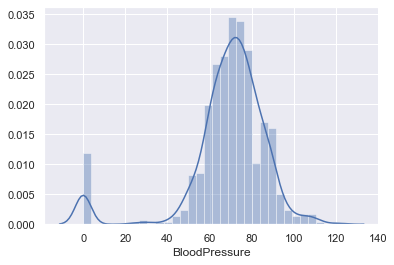

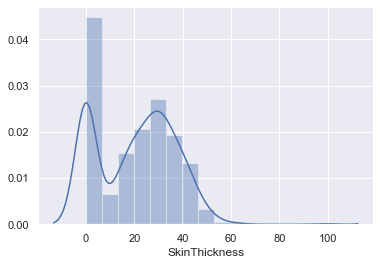

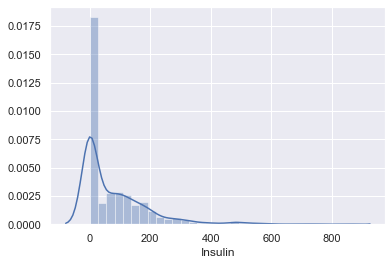

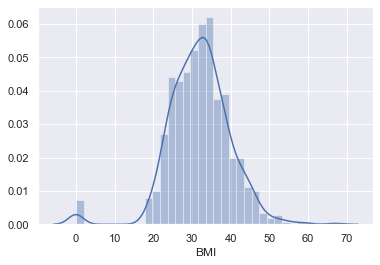

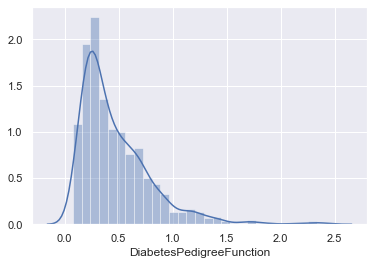

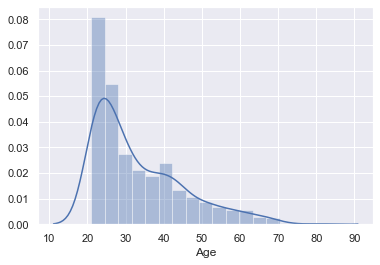

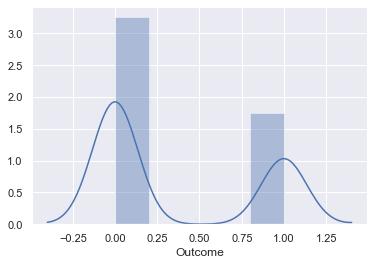

In [9]:
data_feature = data.columns

for feature in data_feature:
    p = sns.distplot(a = data[feature])
    plt.show()

**Removal of Zeros**\
\
Since there are many zeros in data and values of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cannot be zero,
Therefore, Converriting Zeros into NaN value

In [10]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [11]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [12]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

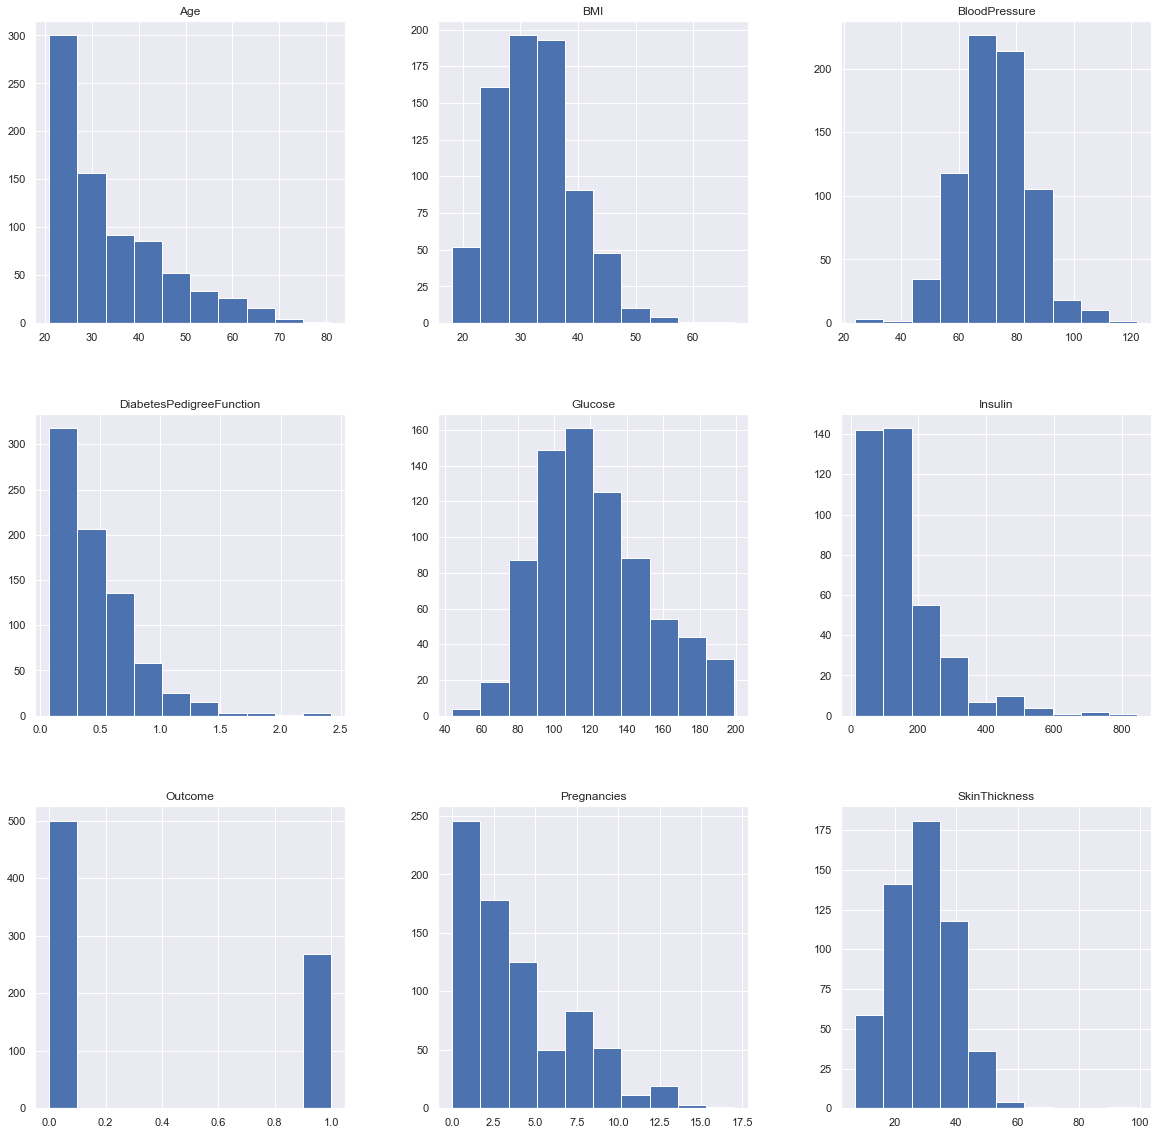

In [13]:
# for feature in data_feature:
#     plt.hist(data[feature])
#     plt.show()
p = data.hist(figsize = (20,20))

**Handling Missing Values**\
\
Filling NaN values with suitable mean and median values

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [15]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
# data.isnull().sum()

In [16]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
# data.isnull().sum()

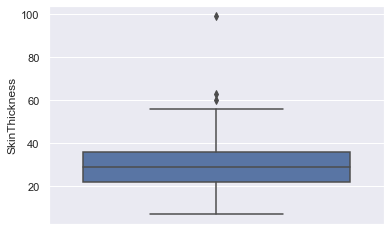

In [17]:
sns.boxplot(y = 'SkinThickness', data = data)

In [18]:
data['SkinThickness'].mean(), data['SkinThickness'].median() 

(29.153419593345657, 29.0)

In [19]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
# data.isnull().sum()

In [20]:
data['Insulin'].mean(), data['Insulin'].median() 

(155.5482233502538, 125.0)

In [21]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
# data.isnull().sum()

In [22]:
data['BMI'].mean(), data['BMI'].median() 

(32.45746367239099, 32.3)

In [23]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
# data.isnull().sum()

In [24]:
for i in range(9):
    print(data.columns[i])

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


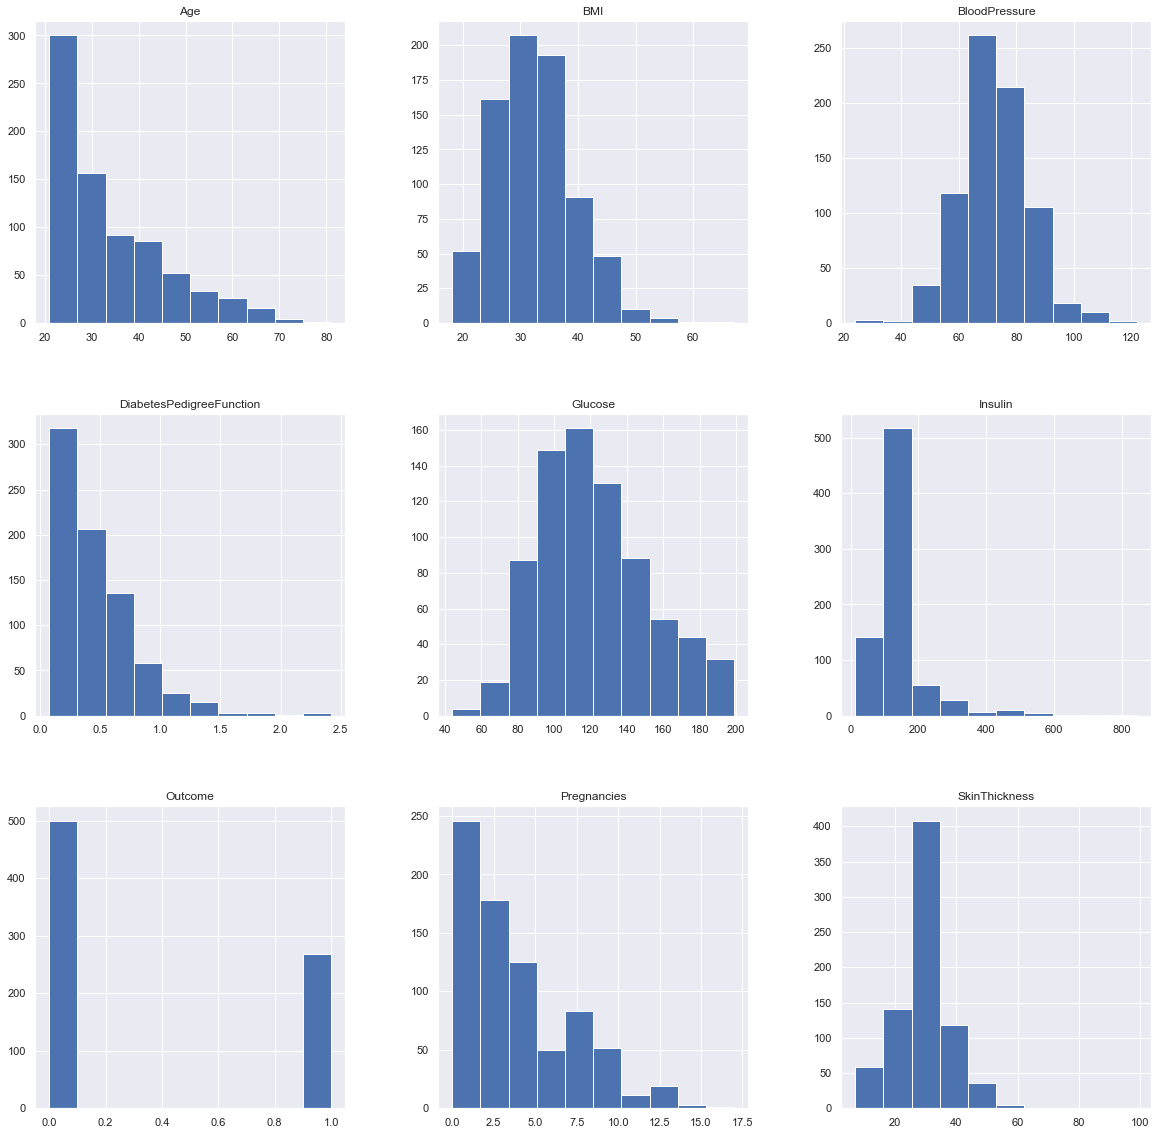

In [25]:
# for feature in data.columns:
#     plt.hist(data[feature])
#     plt.title(feature)
#     plt.show()
p = data.hist(figsize = (20,20))

**Pair Plot to see Distribution of all data at a time and dependencies**

C:\Users\korla\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\korla\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


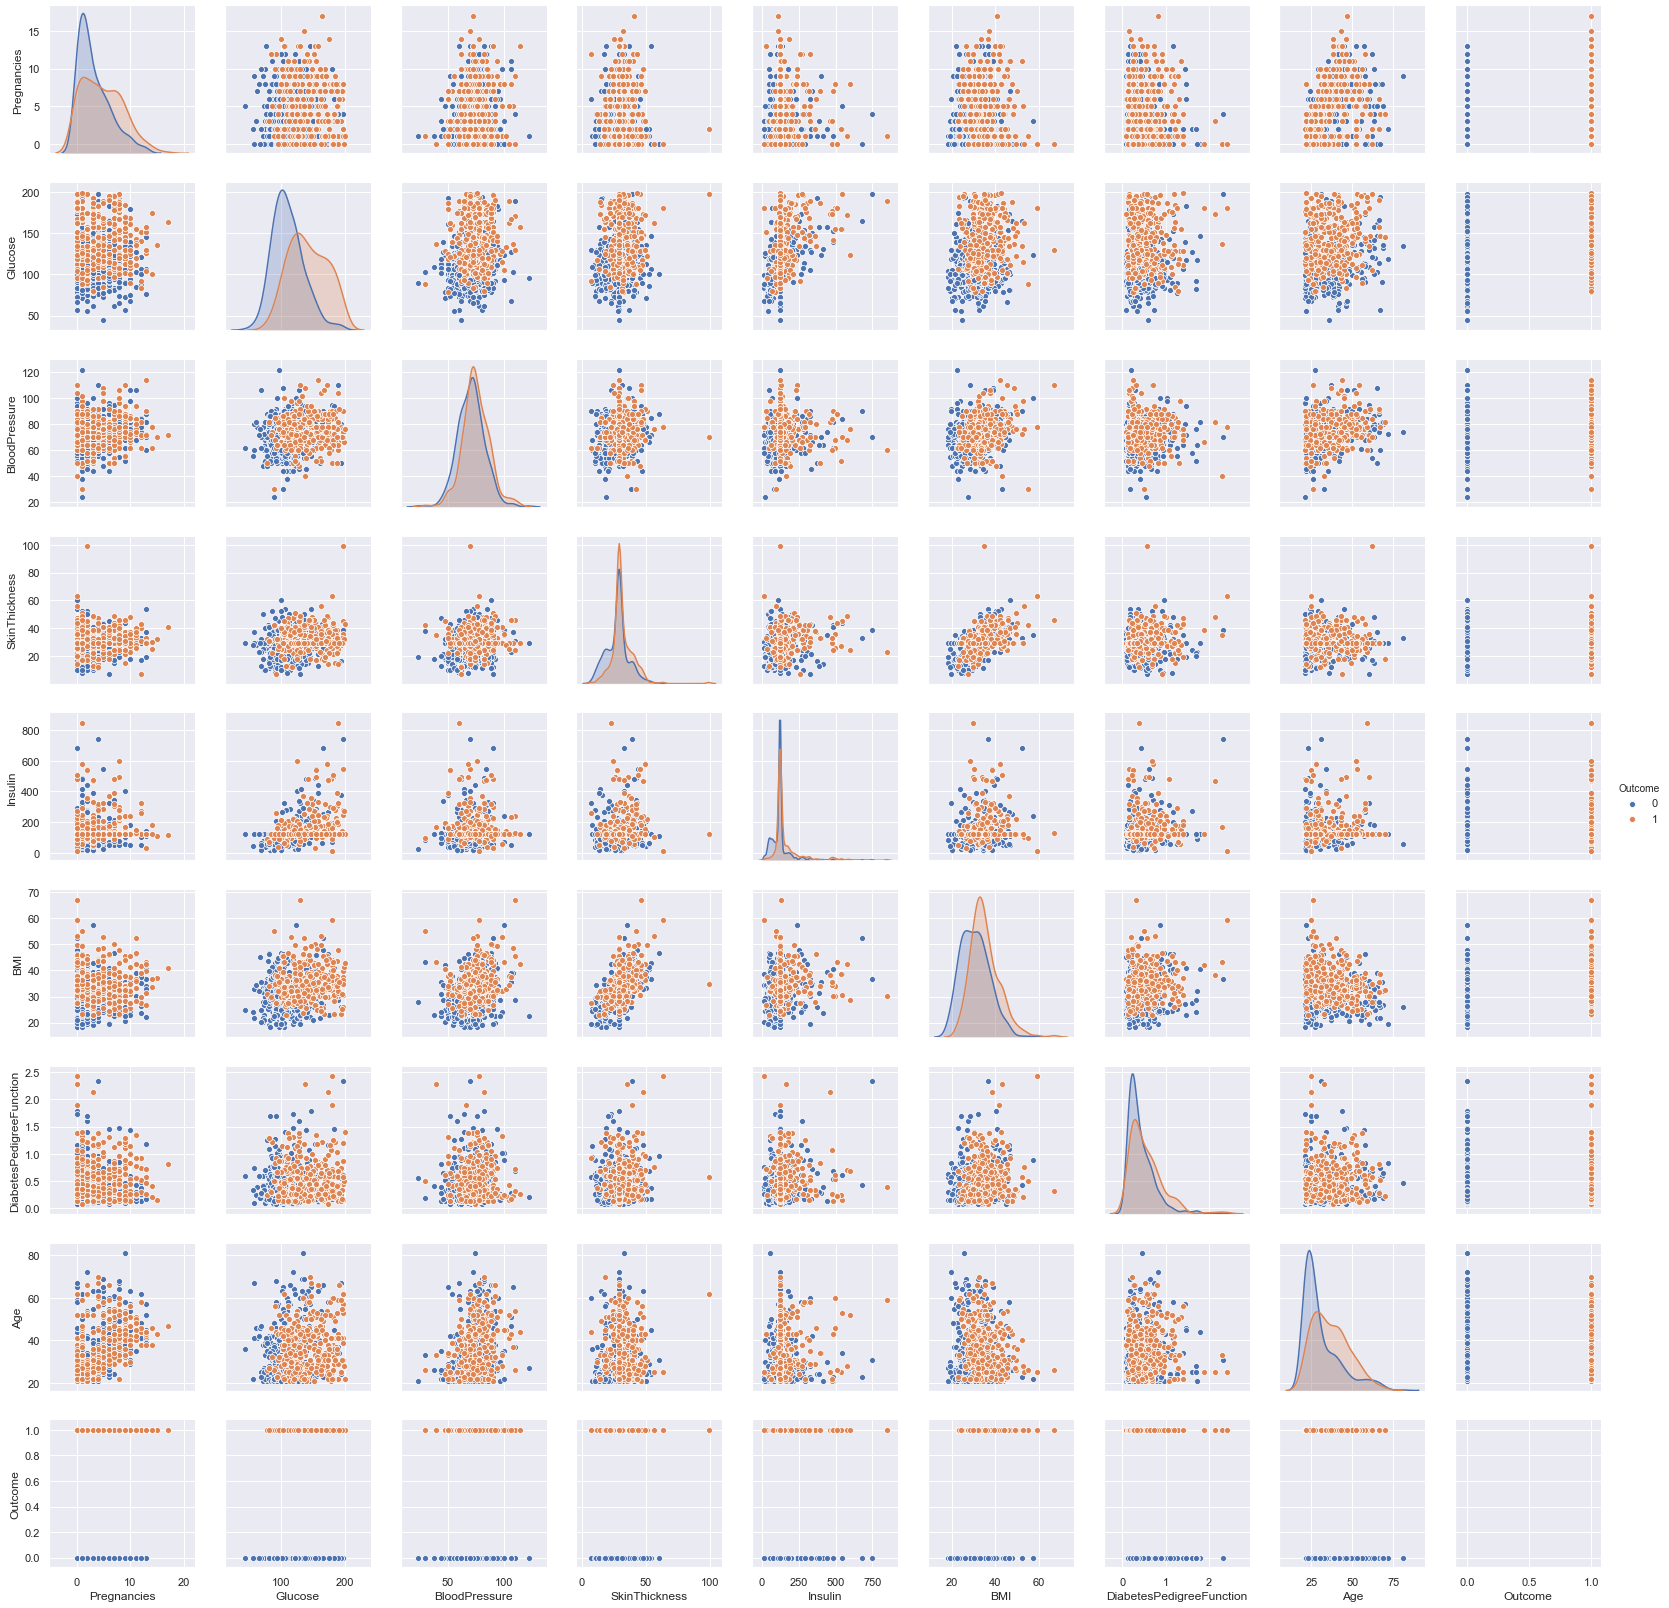

In [26]:
sns.pairplot(data =data, hue = 'Outcome')
plt.show()

**Heat Map**\
\
Gives Relation of different attribute with each other

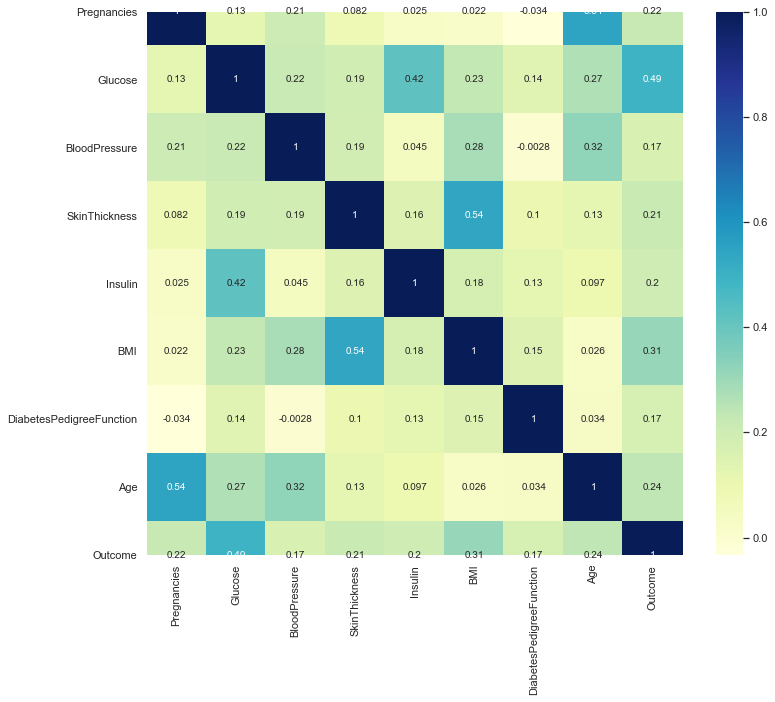

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

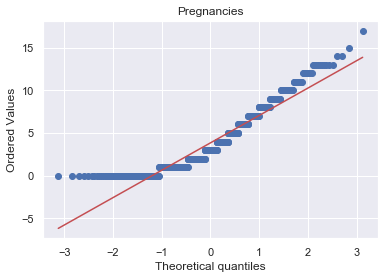

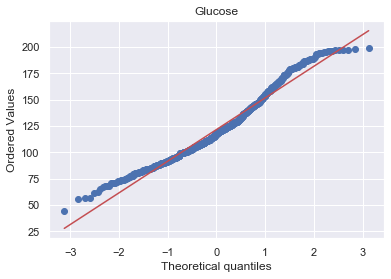

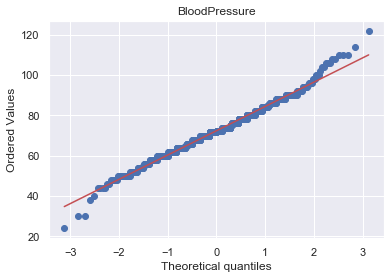

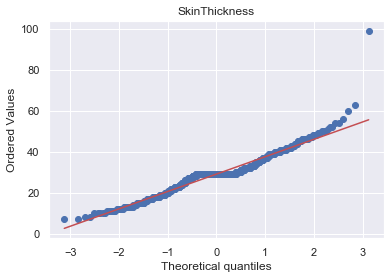

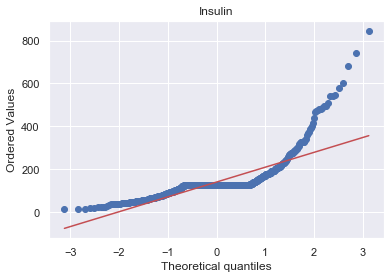

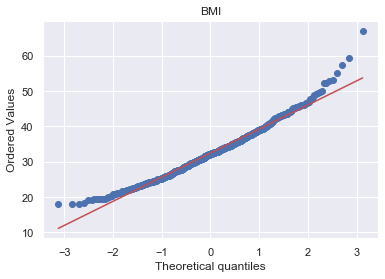

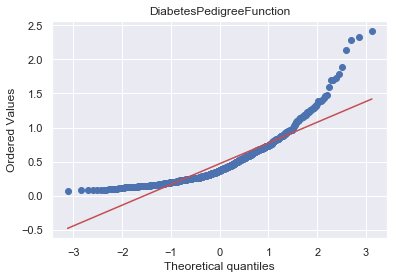

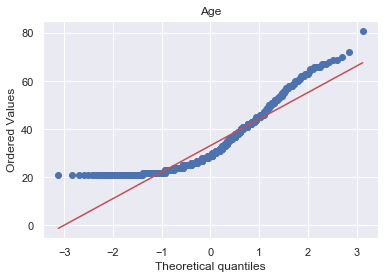

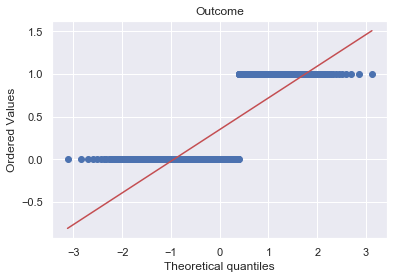

In [28]:
from scipy import stats
for feature in data.columns:
    stats.probplot(data[feature], plot = plt)
    plt.title(feature)
    plt.show()

---

## Standardizing Data

In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [30]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [31]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [33]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [34]:
# X[:] = scale.fit_transform(X[:])

In [35]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


---

## Splitting data into train and test set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

---

## Fitting data in various models

In [37]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [38]:

def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [39]:

def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [40]:

def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [41]:

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [42]:

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [43]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 1.0
Test score : 0.6948051948051948
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.8013029315960912
Test score : 0.7662337662337663
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.745928338762215
Test score : 0.7857142857142857
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.6883116883116883

C:\Users\korla\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 0.988599348534202
Test score : 0.7792207792207793


C:\Users\korla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


---

## Performance Metrics

In [44]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

C:\Users\korla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[91, 16],
       [19, 28]], dtype=int64)

In [45]:
# classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
# classifier_svm.fit(X_train, y_train)
# y_pred = classifier_svm.predict(X_test)

# cm = confusion_matrix(y_test, y_pred)
# cm

In [46]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,91,16,107
1,19,28,47
All,110,44,154


**Checking data is balanced or not**

In [47]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Classification Report (Accuracy, Precision, Recall, F1-score)**

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.64      0.60      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



**Getting probability instead of A/B test**

In [50]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([1. , 0. , 0. , 0.7, 0.2, 0.1, 0.9, 0.9, 0.3, 0.4, 0.8, 0.8, 0.2,
       0.2, 0.2, 0.3, 0.8, 0.1, 0.5, 0. , 0.6, 0.1, 0. , 0.3, 0. , 0.6,
       0.1, 1. , 0. , 0.2, 0.3, 0. , 0.2, 0.5, 0.2, 0.4, 0.4, 0.1, 0.2,
       0.6, 0.2, 0. , 0. , 0.6, 0.5, 0. , 0.1, 0.1, 0.4, 0.4, 0.2, 0.2,
       0.8, 0.8, 0.4, 0. , 0.3, 0.5, 0.4, 0.4, 0.5, 0.7, 0.1, 0.8, 0.9,
       0.6, 0.6, 0.1, 0.8, 0.2, 0. , 0.2, 0.4, 0.8, 0.8, 0.3, 0.1, 0.8,
       0.3, 0.4, 0.5, 0.5, 0.2, 0. , 0. , 0.2, 0.2, 0.3, 1. , 0. , 0.4,
       0. , 0.1, 0. , 0.8, 0.1, 0.3, 0.6, 0.6, 0.6, 0.1, 0. , 0.5, 0. ,
       0.8, 0.9, 0.2, 0.7, 0.1, 0.4, 0.2, 0.6, 0.7, 0.5, 0.9, 0.5, 0.1,
       0.5, 0.4, 0.7, 0.3, 0.3, 0.2, 0.4, 0.2, 0. , 0.6, 0.4, 0.2, 0.7,
       0.7, 0.4, 0.1, 0.4, 0.2, 0.7, 0.3, 0.6, 0.6, 0.1, 0. , 0.8, 0. ,
       0.2, 0.7, 0. , 0. , 0. , 0.2, 0.3, 0. , 0.7, 0. , 0.5])

**Evaluating FPR, TPR, Threshold**

In [51]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.00934579 0.00934579 0.07476636 0.11214953 0.14953271
 0.21495327 0.28971963 0.39252336 0.60747664 0.74766355 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.04255319 0.14893617 0.27659574 0.40425532 0.59574468
 0.70212766 0.89361702 0.93617021 0.95744681 1.         1.        ]


**Plotting ROC Curve**

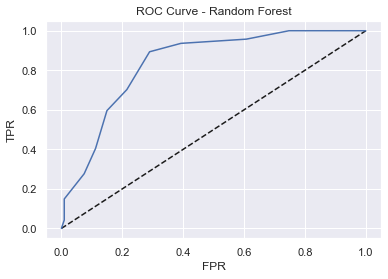

In [52]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

**ROC Score**

In [53]:
roc_auc_score(y_test,y_pred_prob)

0.8347584012726189

---

## Hyperparameter Tunning

In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7281189930581786 0.06644485749880426


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [57]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

C:\Users\korla\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best_accuracy =  0.7638436482084691
best_parameters =  {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 50}


In [58]:
random = RandomForestClassifier(criterion = 'gini', max_depth = 14, n_estimators = 500)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [14, 33]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       107
           1       0.72      0.70      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



---

## Saving model using pickle

In [60]:
filename = 'diabetes_model.pkl'
pickle.dump(random, open(filename, 'wb'))

In [61]:
model = open('diabetes_model.pkl','rb')
forest = pickle.load(model)

In [62]:
y_pred = forest.predict(X_test)

In [63]:
confusion_matrix(y_test, y_pred)

array([[94, 13],
       [14, 33]], dtype=int64)

In [64]:
import sklearn

In [65]:
sklearn.__version__

'0.21.3'

In [66]:
import sklearn

In [67]:
from sklearn.model_selection import train_test_split